In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/home/cbrom/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# return training data
def get_train():
    seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
    seq = np.array(seq)
    X, y = seq[:, 0], seq[:, 1]
    X = X.reshape((5, 1, 1))
    return X, y

# return validation data
def get_val():
    seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
    seq = np.array(seq)
    X, y = seq[:, 0], seq[:, 1]
    X = X.reshape((5, 1, 1))
    return X, y

In [3]:
# fit an LSTM model
def fit_model(n_cells):
    # define model
    model = Sequential()
    model.add(LSTM(n_cells, input_shape=(1, 1)))
    model.add(Dense(1, activation='linear'))
    # compile model
    model.compile(loss='mse', optimizer='adam')
    # fit model
    X, y = get_train()
    history = model.fit(X, y, epochs = 500, shuffle=False, verbose=0)
    # evaluate model
    valX, valY = get_val()
    loss = model.evaluate(valX, valY, verbose=0)
    return loss

** Search parameters **

>15 param=1.000000, loss=0.229970
>25 param=1.000000, loss=0.103518
>35 param=1.000000, loss=0.291327
>45 param=1.000000, loss=0.346577
>55 param=1.000000, loss=0.127797
>15 param=5.000000, loss=0.097759
>25 param=5.000000, loss=0.056957
>35 param=5.000000, loss=0.212590
>45 param=5.000000, loss=0.048922
>55 param=5.000000, loss=0.134759
>15 param=10.000000, loss=0.014563
>25 param=10.000000, loss=0.019800
>35 param=10.000000, loss=0.040385
>45 param=10.000000, loss=0.048574
>55 param=10.000000, loss=0.023046
              1         5        10
count  5.000000  5.000000  5.000000
mean   0.219838  0.110198  0.029274
std    0.104017  0.066767  0.014499
min    0.103518  0.048922  0.014563
25%    0.127797  0.056957  0.019800
50%    0.229970  0.097759  0.023046
75%    0.291327  0.134759  0.040385
max    0.346577  0.212590  0.048574


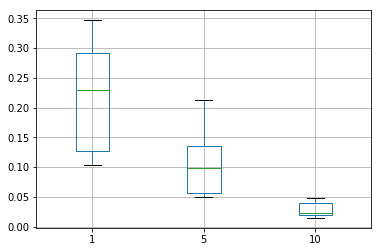

In [4]:
# define scope of search
params = [1, 5, 10]
n_repeats = 5
# grid search parameter values
scores = pd.DataFrame()
for value in params:
    # repeat each experiment multiple times
    loss_values = []
    for i in range(n_repeats):
        loss = fit_model(value)
        loss_values.append(loss)
        print('>%d%d param=%f, loss=%f' %(i+1, n_repeats, value, loss))
    # store results for this parameter
    scores[str(value)] = loss_values
# summary statistics of results
print(scores.describe())
# box and whisker plot of results
scores.boxplot()
plt.show()